<a href="https://colab.research.google.com/github/sbb2002/Portfolio/blob/main/.study/PyTorch/PyTorch_ch2_linear_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
# For reproducibility
torch.manual_seed(1)

|x|y|
|-|-|
|1|2|
|2|4|
|3|6|

이것을 예시로 x_train으로 사용해봅시다.

# General hypo.

In [ ]:
# Dataset
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

# Model initialize
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# Optimizer
optimizer = optim.SGD([W, b], lr=0.01)

# Run
nb_epochs = 1000
for epoch in range(1, nb_epochs + 1):
  hypothesis = x_train * W + b
  # hypothesis = x_train.matmul(W) + b  # or .mm or @
  '''
  matmul()을 이용하면...
  1. 더 간결하고
  2. x의 길이가 바뀌어도 코드를 바꿀 필요가 없고
  3. 속도도 더 빠르다!
  '''
  cost = torch.mean((hypothesis - y_train) ** 2)
  
  # cost로 H(x) 개선. (Always use this code.)
  optimizer.zero_grad()   # grad. 초기화
  cost.backward()         # grad. 계산
  optimizer.step()        # 개선

  if epoch % 100 == 0:
    print('Epoch: {:4d}/{} \: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(epoch, nb_epochs, W.item(), b.item(), cost.item()))

Epoch:  100/1000 \: 1.745, b: 0.579 Cost: 0.048403
Epoch:  200/1000 \: 1.800, b: 0.456 Cost: 0.029910
Epoch:  300/1000 \: 1.842, b: 0.358 Cost: 0.018483
Epoch:  400/1000 \: 1.876, b: 0.281 Cost: 0.011421
Epoch:  500/1000 \: 1.903, b: 0.221 Cost: 0.007058
Epoch:  600/1000 \: 1.923, b: 0.174 Cost: 0.004361
Epoch:  700/1000 \: 1.940, b: 0.137 Cost: 0.002695
Epoch:  800/1000 \: 1.953, b: 0.107 Cost: 0.001665
Epoch:  900/1000 \: 1.963, b: 0.084 Cost: 0.001029
Epoch: 1000/1000 \: 1.971, b: 0.066 Cost: 0.000636


In [ ]:
prediction = W * x_train + b
prediction = list(prediction)

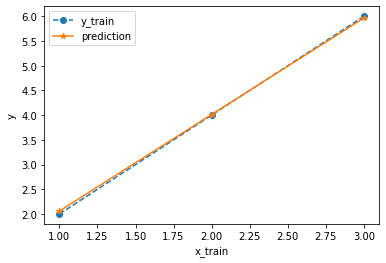

당연하게도 이 쉬운 예시용 데이터는 기울기(W)는 2, y절편(b)은 0입니다.
 모델은 완전하게 W와 b를 맞추지는 못하지만 아주 근사한 값을 얻어냅니다. epoch가 많을 수록 더 정확해집니다.


In [ ]:
import matplotlib.pyplot as plt

plt.plot(x_train, y_train, marker='o', linestyle='--')    # x-y graph 1개 추가, 'o'(점 표시), '--'(점선)
plt.plot(x_train, prediction, marker='*') # x-y graph 1개 추가, '8'(별 표시)
plt.xlabel('x_train')
plt.ylabel('y')
plt.legend(['y_train', 'prediction'])
plt.show()

print('당연하게도 이 쉬운 예시용 데이터는 기울기(W)는 2, y절편(b)은 0입니다.\n \
모델은 완전하게 W와 b를 맞추지는 못하지만 아주 근사한 값을 얻어냅니다. \
epoch가 많을 수록 더 정확해집니다.')

## Hi-lv. implementation w/ nn.Module

위의 방식은 정론적인 방법이다. 한마디로 Low-lv. implementation이다. 이번에는 pytorch 내에 있는 기능을 이용해서 Hi-lv. implementation해보자. 여기서는 hypothesis를 따로 정의하지 않는다.

class를 이용해 nn.Module을 inherit(상속)해서 사용한다.

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(1, 1)

  def forward(self, x):
    return self.linear(x)

In [ ]:
# Dataset
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

# Model initialize
model = LinearRegressionModel()

# Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Run
nb_epochs = 1000
for epoch in range(1, nb_epochs + 1):
  prediction = model(x_train)
  cost = F.mse_loss(prediction, y_train)
  
  # cost로 H(x) 개선. (Always use this code.)
  optimizer.zero_grad()   # grad. 초기화
  cost.backward()         # grad. 계산
  optimizer.step()        # 개선

  if epoch % 100 == 0:
    params = list(model.parameters())
    W = params[0].item()
    b = params[1].item()
    print('Epoch: {:4d}/{} \: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(epoch, nb_epochs, W, b, cost.item()))

Epoch:  100/1000 \: 1.584, b: 0.945 Cost: 0.128669
Epoch:  200/1000 \: 1.673, b: 0.743 Cost: 0.079509
Epoch:  300/1000 \: 1.743, b: 0.584 Cost: 0.049132
Epoch:  400/1000 \: 1.798, b: 0.459 Cost: 0.030361
Epoch:  500/1000 \: 1.841, b: 0.361 Cost: 0.018761
Epoch:  600/1000 \: 1.875, b: 0.284 Cost: 0.011593
Epoch:  700/1000 \: 1.902, b: 0.223 Cost: 0.007164
Epoch:  800/1000 \: 1.923, b: 0.175 Cost: 0.004427
Epoch:  900/1000 \: 1.939, b: 0.138 Cost: 0.002736
Epoch: 1000/1000 \: 1.952, b: 0.108 Cost: 0.001690


# Multivariable linear regression

|국어($x_1$)|영어($x_2$)|수학($x_3$)|표준 총점($y$)|
|-|-|-|-|
|73|80|75|152|
|93|88|93|185|
|-|-|-|-|
|-|-|-|-|

변수가 3개가 있는 입력데이터, 국영수 표준점수 성적표가 있다. 이것으로 W와 b를 얻어보자.

In [ ]:
# 데이터
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

## Naive data representation

In [ ]:
# model initialize
w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# set the optimizer
optimizer = optim.SGD([w1, w2, w3, b], lr=1e-5)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
  hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b
  cost = torch.mean((hypothesis - y_train) ** 2)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print('Epoch: {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
        epoch, nb_epochs, w1.item(), w2.item(), w3.item(), b.item(), cost.item()))

Epoch:    0/1000 w1: 0.294 w2: 0.294 w3: 0.297 b: 0.003 Cost: 29661.800781
Epoch:  100/1000 w1: 0.674 w2: 0.661 w3: 0.676 b: 0.008 Cost: 1.563628
Epoch:  200/1000 w1: 0.679 w2: 0.655 w3: 0.677 b: 0.008 Cost: 1.497595
Epoch:  300/1000 w1: 0.684 w2: 0.649 w3: 0.677 b: 0.008 Cost: 1.435044
Epoch:  400/1000 w1: 0.689 w2: 0.643 w3: 0.678 b: 0.008 Cost: 1.375726
Epoch:  500/1000 w1: 0.694 w2: 0.638 w3: 0.678 b: 0.009 Cost: 1.319507
Epoch:  600/1000 w1: 0.699 w2: 0.633 w3: 0.679 b: 0.009 Cost: 1.266222
Epoch:  700/1000 w1: 0.704 w2: 0.627 w3: 0.679 b: 0.009 Cost: 1.215703
Epoch:  800/1000 w1: 0.709 w2: 0.622 w3: 0.679 b: 0.009 Cost: 1.167810
Epoch:  900/1000 w1: 0.713 w2: 0.617 w3: 0.680 b: 0.009 Cost: 1.122429
Epoch: 1000/1000 w1: 0.718 w2: 0.613 w3: 0.680 b: 0.009 Cost: 1.079390


## Matrix data representation

In [ ]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

# model initialize
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# set opt
optimizer = optim.SGD([W, b], lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs + 1):
  hypothesis = x_train.matmul(W) + b  # or .mm or @
  cost = torch.mean((hypothesis - y_train) ** 2)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  print('Epoch: {:4d}/{} Hypothesis: {} Cost: {:.6f}'.format(
      epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
  ))

Epoch:    0/20 Hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch:    1/20 Hypothesis: tensor([67.2578, 80.8397, 79.6523, 86.7394, 61.6605]) Cost: 9298.520508
Epoch:    2/20 Hypothesis: tensor([104.9128, 126.0990, 124.2466, 135.3015,  96.1821]) Cost: 2915.712402
Epoch:    3/20 Hypothesis: tensor([125.9942, 151.4381, 149.2133, 162.4896, 115.5097]) Cost: 915.040527
Epoch:    4/20 Hypothesis: tensor([137.7967, 165.6247, 163.1911, 177.7112, 126.3307]) Cost: 287.936096
Epoch:    5/20 Hypothesis: tensor([144.4044, 173.5674, 171.0168, 186.2332, 132.3891]) Cost: 91.371063
Epoch:    6/20 Hypothesis: tensor([148.1035, 178.0143, 175.3980, 191.0042, 135.7812]) Cost: 29.758249
Epoch:    7/20 Hypothesis: tensor([150.1744, 180.5042, 177.8509, 193.6753, 137.6805]) Cost: 10.445267
Epoch:    8/20 Hypothesis: tensor([151.3336, 181.8983, 179.2240, 195.1707, 138.7440]) Cost: 4.391237
Epoch:    9/20 Hypothesis: tensor([151.9824, 182.6789, 179.9928, 196.0079, 139.3396]) Cost: 2.493121
Epoch:  

## Hi-lv. implementation w/ nn.Module

이제 눈치챘겠지만, Hi-lv에서는 W, b에 대해 정의할 필요가 없어지고, cost는 torch.nn.Functional을 이용한다.

In [ ]:
class MultivariateLinearRegressionmodel(nn.Module):   # nn.Module에서 상속받음.
  def __init__(self):
    super().__init__()    # 부모에게 물려받은 것을 자식에서 사용하려면 무조건 super()를 사용해야함.
    ''' 
    왜냐하면 부모의 __init__()이 자식의 __init__에 덮어쓰기(over_writing)되기 때문이다.
    이를 방지하려면 super().__init__()을 통해 부모의 __init__()을 쓸 수 있게 된다.
    '''
    self.linear = nn.Linear(3, 1)   # 입력차원 3, 출력차원 1

  def forward(self, x):   # hypothesis 계산을 해준다. gradient는 밑에 backward()에서 해준다.
    return self.linear(x)

In [ ]:
# model initialize
model = MultivariateLinearRegressionmodel()

# set opt
optimizer = optim.SGD(model.parameters(), lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs + 1):
  # H(x) calculate
  prediction = model(x_train)

  # cost calculate
  cost = F.mse_loss(prediction, y_train)
  # cost = torch.mean((hypothesis - y_train) ** 2)
  '''
  이 식은 동일하지만 F.mse_loss를 이용하면 다른 형태의 loss와 교체가 쉽고 디버깅하기도 쉽다.
  ex. l1_loss, smooth_l1_loss 등...
  '''

  # enhance H(x) from cost
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  print('Epoch: {:4d}/{} Cost: {:.6f}'.format(
      epoch, nb_epochs, cost.item()
  ))

Epoch:    0/20 Cost: 39633.414062
Epoch:    1/20 Cost: 12431.271484
Epoch:    2/20 Cost: 3904.839111
Epoch:    3/20 Cost: 1232.251465
Epoch:    4/20 Cost: 394.532959
Epoch:    5/20 Cost: 131.948334
Epoch:    6/20 Cost: 49.637383
Epoch:    7/20 Cost: 23.833122
Epoch:    8/20 Cost: 15.740526
Epoch:    9/20 Cost: 13.199554
Epoch:   10/20 Cost: 12.398767
Epoch:   11/20 Cost: 12.143410
Epoch:   12/20 Cost: 12.059070
Epoch:   13/20 Cost: 12.028246
Epoch:   14/20 Cost: 12.014258
Epoch:   15/20 Cost: 12.005583
Epoch:   16/20 Cost: 11.998546
Epoch:   17/20 Cost: 11.992002
Epoch:   18/20 Cost: 11.985615
Epoch:   19/20 Cost: 11.979303
Epoch:   20/20 Cost: 11.972960
